In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()#take a look at the dataset
#head() function is used to see first n rows of dataset, default is n = 5.
# to see all rows simply write df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe() #description of data.

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


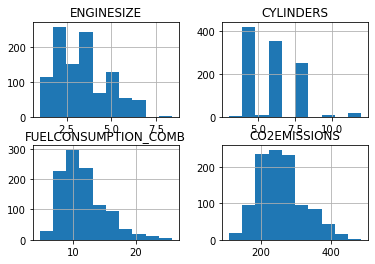

In [5]:
cdf.hist()
plt.show()

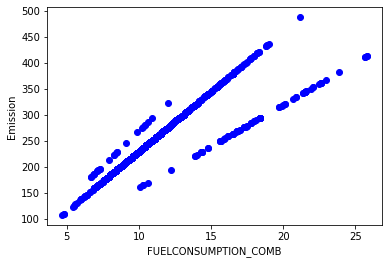

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

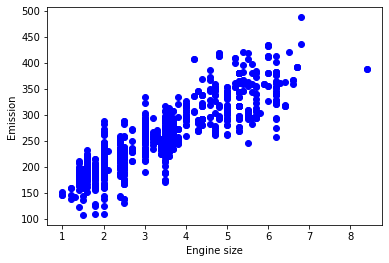

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

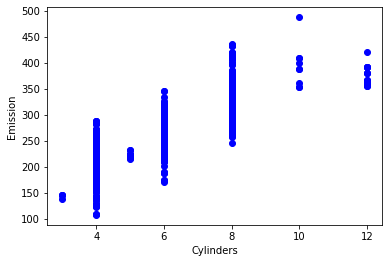

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [9]:
x0 = np.ones((np.size(cdf,0),1))
cdf.insert(0,'x0',x0,True)

In [10]:
msk = np.random.rand(len(df)) < 0.8 # 80% of total length.
train = cdf[msk]
test = cdf[~msk]

In [11]:
X = train[['x0','ENGINESIZE']]
X

,x0,ENGINESIZE
1,1.0,2.4
2,1.0,1.5
3,1.0,3.5
4,1.0,3.5
5,1.0,3.5
...,...,...
1061,1.0,3.2
1062,1.0,3.0
1063,1.0,3.2
1065,1.0,3.2


In [12]:
Y = train.CO2EMISSIONS
Y

1       221
2       136
3       255
4       244
5       230
       ... 
1061    258
1062    271
1063    264
1065    260
1066    294
Name: CO2EMISSIONS, Length: 865, dtype: int64

In [13]:
M = np.size(X,0)
Theta = [0,0]
Iterations = 1500
Alpha = 0.01
Theta

[0, 0]

In [14]:
def computeCost(x, y, theta):
    m = np.size(y,0)
    J = 0
    h = np.matmul(x,theta)
    s = np.transpose(np.transpose(h) - y)
    J = (np.matmul(np.transpose(s),s))/(2*m)
    return J

In [15]:
computeCost(X,Y,Theta)

34688.34393063584

In [16]:
computeCost(X, Y,[-1, 2])

33104.2412716763

In [17]:
def gradientDescent(x,y,theta,alpha,num_iters):
    m = np.size(y,0)
    J_history = np.zeros((num_iters,1))
    for iter in range(0,num_iters):
        h = np.matmul(x,theta)
        s = np.transpose(np.transpose(h) - y)
        theta = theta - (np.matmul(np.transpose(X), s))*(Alpha/M)
        J_history[iter] = computeCost(x,y,theta)
    return theta, J_history;

In [18]:
Theta, J = gradientDescent(X,Y,Theta,Alpha,Iterations)
Theta

x0            112.533753
ENGINESIZE     42.407376
dtype: float64

In [19]:
# Theta, J = gradientDescent(X,Y,Theta,Alpha,50000)
# J #incresing value of  iterations will optimise gradient descent algorithms.

In [20]:
H = np.matmul(X,Theta)
H

1       214.311455
2       176.144817
3       260.959569
4       260.959569
5       260.959569
           ...    
1061    248.237356
1062    239.755881
1063    248.237356
1065    248.237356
1066    248.237356
Length: 865, dtype: float64

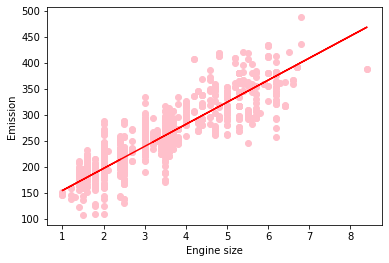

In [21]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='pink')
plt.plot(train['ENGINESIZE'],H, color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.18492625]]
Intercept:  [125.06547401]


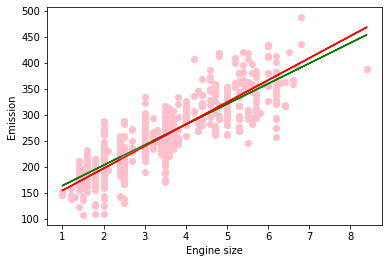

In [23]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='pink')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'green')
plt.plot(train['ENGINESIZE'],H, color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [24]:
#normalisation method same as sklearn method
T = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)) , np.matmul(np.transpose(X),Y))
T

C:\Users\anike\AppData\Local\Temp/ipykernel_16088/1674817510.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  T = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)) , np.matmul(np.transpose(X),Y))


array([125.06547401,  39.18492625])